In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage import io, color, img_as_ubyte

In [2]:
def calculate_glcm_properties_per_channel(image_list):
    contrast_r, contrast_g, contrast_b = [], [], []
    correlation_r, correlation_g, correlation_b = [], [], []
    homogeneity_r, homogeneity_g, homogeneity_b = [], [], []
    
    for img_path in image_list:
        image = io.imread(img_path)
        
        # Pisahkan channel warna
        red_channel = image[:, :, 0]
        green_channel = image[:, :, 1]
        blue_channel = image[:, :, 2]
        
        # Menghitung GLCM untuk setiap channel
        def glcm_props(channel):
            image = img_as_ubyte(channel)

            bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
            inds = np.digitize(image, bins)
            max_value = inds.max()+1
            glcm = graycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, symmetric=False, normed=False)
            contrast = graycoprops(glcm, 'contrast')[0, 0]
            correlation = graycoprops(glcm, 'correlation')[0, 0]
            homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
            return contrast, correlation, homogeneity

        # Ekstraksi properti untuk tiap channel
        c_r, co_r, h_r = glcm_props(red_channel)
        c_g, co_g, h_g = glcm_props(green_channel)
        c_b, co_b, h_b = glcm_props(blue_channel)
        
        contrast_r.append(c_r)
        correlation_r.append(co_r)
        homogeneity_r.append(h_r)
        
        contrast_g.append(c_g)
        correlation_g.append(co_g)
        homogeneity_g.append(h_g)
        
        contrast_b.append(c_b)
        correlation_b.append(co_b)
        homogeneity_b.append(h_b)
    
    # Mengembalikan rata-rata dari setiap properti
    return (np.mean(contrast_r), np.mean(correlation_r), np.mean(homogeneity_r),
            np.mean(contrast_g), np.mean(correlation_g), np.mean(homogeneity_g),
            np.mean(contrast_b), np.mean(correlation_b), np.mean(homogeneity_b))

In [3]:
base_dir = 'data/images/'

sessions = [
    [os.path.join(base_dir, 'take_1', f'take_1-{i}.png') for i in range(1, 11)],  # Sesi 1
    [os.path.join(base_dir, 'take_2', f'take_2-{i}.png') for i in range(1, 11)],  # Sesi 2
    [os.path.join(base_dir, 'take_3', f'take_3-{i}.png') for i in range(1, 11)],  # Sesi 3
    [os.path.join(base_dir, 'take_4', f'take_4-{i}.png') for i in range(1, 11)],  # Sesi 4
    [os.path.join(base_dir, 'take_5', f'take_5-{i}.png') for i in range(1, 11)],  # Sesi 5
]

In [4]:
avg_contrast_r, avg_correlation_r, avg_homogeneity_r = [], [], []
avg_contrast_g, avg_correlation_g, avg_homogeneity_g = [], [], []
avg_contrast_b, avg_correlation_b, avg_homogeneity_b = [], [], []

for session in sessions:
    c_r, co_r, h_r, c_g, co_g, h_g, c_b, co_b, h_b = calculate_glcm_properties_per_channel(session)
    
    avg_contrast_r.append(c_r)
    avg_correlation_r.append(co_r)
    avg_homogeneity_r.append(h_r)
    
    avg_contrast_g.append(c_g)
    avg_correlation_g.append(co_g)
    avg_homogeneity_g.append(h_g)
    
    avg_contrast_b.append(c_b)
    avg_correlation_b.append(co_b)
    avg_homogeneity_b.append(h_b)

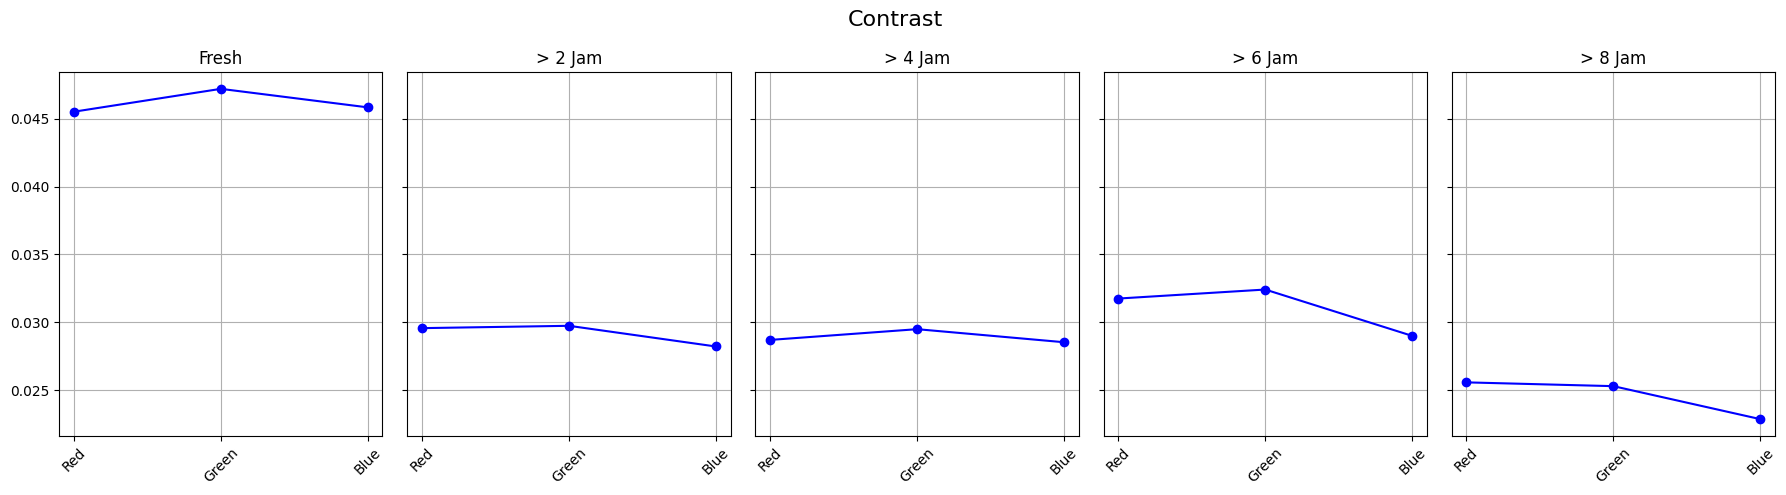

In [5]:
x_labels = ['Red', 'Green', 'Blue']
sessions_labels = ['Fresh', '> 2 Jam', '> 4 Jam', '> 6 Jam', '> 8 Jam']

fig, axs = plt.subplots(1, 5, figsize=(18, 5), sharey=True)

for i, label in enumerate(sessions_labels):
    axs[i].plot(x_labels, [avg_contrast_r[i], avg_contrast_g[i], avg_contrast_b[i]], marker='o', label='Contrast', color='blue')
    axs[i].set_title(label)
    axs[i].set_xticks(np.arange(len(x_labels)))
    axs[i].set_xticklabels(x_labels, rotation=45)
    axs[i].grid(True)

# Label dan judul untuk seluruh figure
fig.suptitle('Contrast', fontsize=16)
plt.tight_layout()
plt.show()

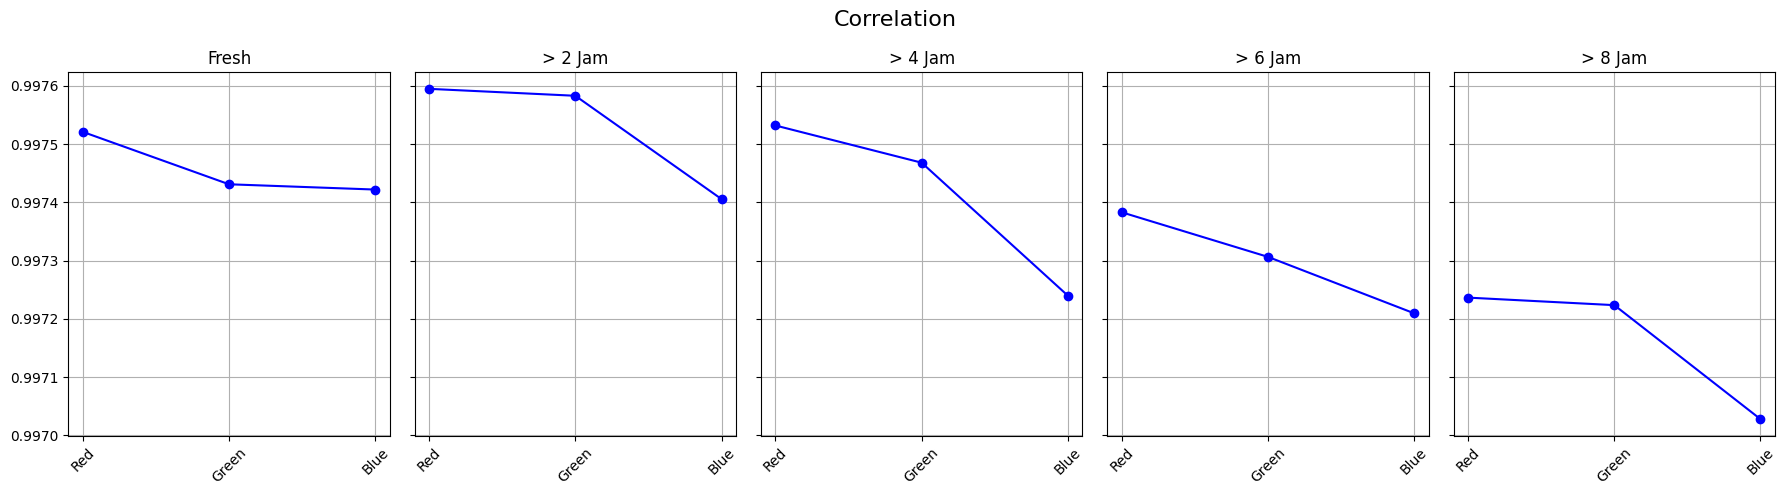

In [6]:
x_labels = ['Red', 'Green', 'Blue']
sessions_labels = ['Fresh', '> 2 Jam', '> 4 Jam', '> 6 Jam', '> 8 Jam']

fig, axs = plt.subplots(1, 5, figsize=(18, 5), sharey=True)

for i, label in enumerate(sessions_labels):
    axs[i].plot(x_labels, [avg_correlation_r[i], avg_correlation_g[i], avg_correlation_b[i]], marker='o', label='Contrast', color='blue')
    axs[i].set_title(label)
    axs[i].set_xticks(np.arange(len(x_labels)))
    axs[i].set_xticklabels(x_labels, rotation=45)
    axs[i].grid(True)

# Label dan judul untuk seluruh figure
fig.suptitle('Correlation', fontsize=16)
plt.tight_layout()
plt.show()

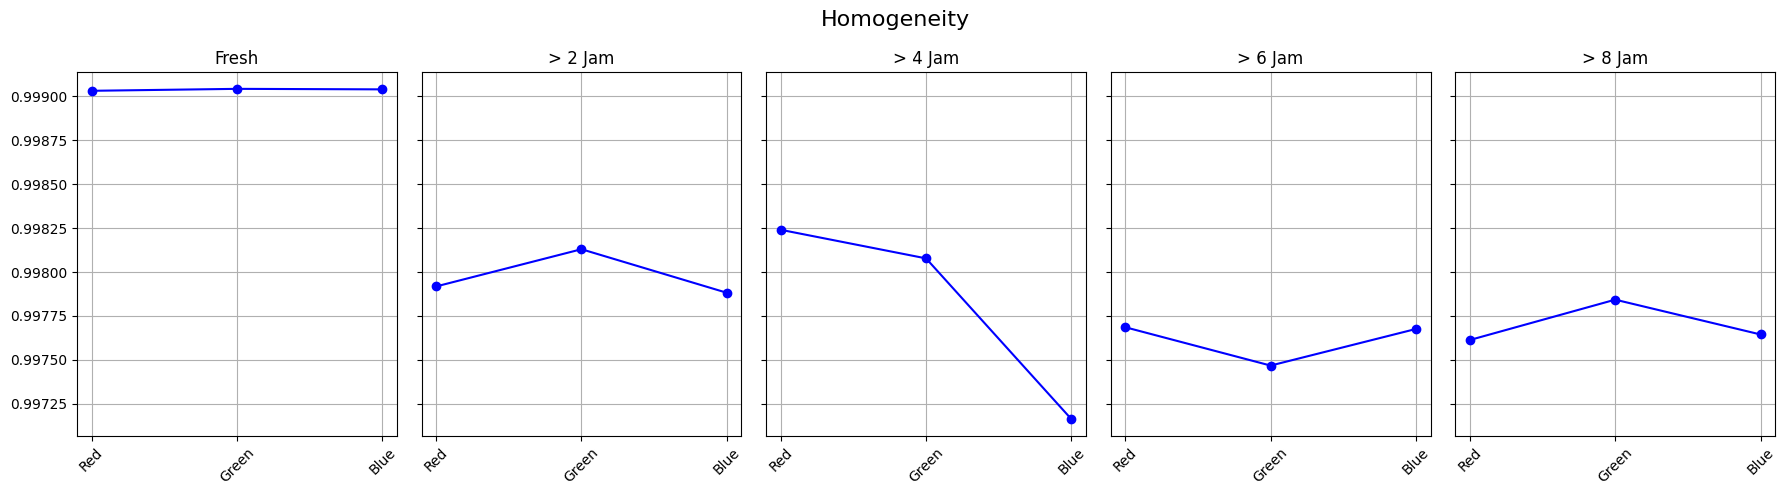

In [7]:
x_labels = ['Red', 'Green', 'Blue']
sessions_labels = ['Fresh', '> 2 Jam', '> 4 Jam', '> 6 Jam', '> 8 Jam']

fig, axs = plt.subplots(1, 5, figsize=(18, 5), sharey=True)

for i, label in enumerate(sessions_labels):
    axs[i].plot(x_labels, [avg_homogeneity_r[i], avg_homogeneity_g[i], avg_homogeneity_b[i]], marker='o', label='Contrast', color='blue')
    axs[i].set_title(label)
    axs[i].set_xticks(np.arange(len(x_labels)))
    axs[i].set_xticklabels(x_labels, rotation=45)
    axs[i].grid(True)

# Label dan judul untuk seluruh figure
fig.suptitle('Homogeneity', fontsize=16)
plt.tight_layout()
plt.show()

In [10]:
std_contrast_r = np.std(avg_contrast_r)
std_contrast_g = np.std(avg_contrast_g)
std_contrast_b = np.std(avg_contrast_b)

std_correlation_r = np.std(avg_correlation_r)
std_correlation_g = np.std(avg_correlation_g)
std_correlation_b = np.std(avg_correlation_b)

std_homogeneity_r = np.std(avg_homogeneity_r)
std_homogeneity_g = np.std(avg_homogeneity_g)
std_homogeneity_b = np.std(avg_homogeneity_b)

print("\t\t\tStandar Deviasi\n")
print("\t\tRed\t\tGreen\t\tBlue")
print("Contrast \t{:}\t{:}\t{:}".format(std_contrast_r, std_contrast_g, std_contrast_b))
print("Correlation \t{:}\t{:}\t{:}".format(std_correlation_r, std_correlation_g, std_correlation_b))
print("Homogeneity \t{:}\t{:}\t{:}".format(std_homogeneity_r, std_homogeneity_g, std_homogeneity_b))

			Standar Deviasi

		Red		Green		Blue
Contrast 	0.006934615259344203	0.007536979925248409	0.007797317666231005
Correlation 	0.00012870448705109257	0.00012568923821045804	0.00014447086815843374
Homogeneity 	0.0005158534725123458	0.0005208969288206167	0.0006258745673062555


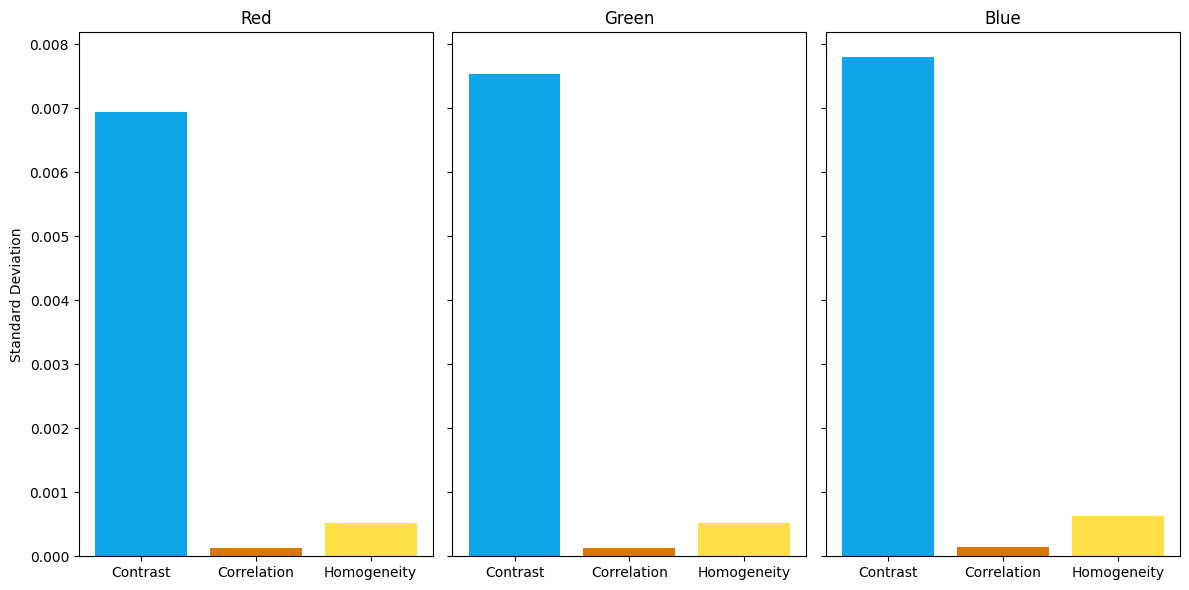

In [9]:
red_values = [std_contrast_r, std_correlation_r, std_homogeneity_r]
green_values = [std_contrast_g, std_correlation_g, std_homogeneity_g]
blue_values = [std_contrast_b, std_correlation_b, std_homogeneity_b]

labels = ['Contrast', 'Correlation', 'Homogeneity']
colors = ['#0ea5e9', '#d97706', '#fde047']

fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

# Plot untuk channel Red
axes[0].bar(labels, red_values, color=colors)
axes[0].set_title('Red')
axes[0].set_ylabel('Standard Deviation')

# Plot untuk channel Green
axes[1].bar(labels, green_values, color=colors)
axes[1].set_title('Green')

# Plot untuk channel Blue
axes[2].bar(labels, blue_values, color=colors)
axes[2].set_title('Blue')

plt.tight_layout()

plt.show()